<center><h1>ML Assignment 2</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<p>For this assignment, I have chosen Mouse Dataset, which has X axis and Y axis of points which represents head, left ear and right ear of a mouse.</p>

<p>I have applied KMeans, AGNES, DIANA(throught R), and SOM clustering on the dataset and given the inference in a separate file.</p>

<h4>Importing Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4>Loading Dataset</h4>

In [2]:
mdata=pd.read_csv("mouse.csv")

In [36]:
mdata['Class'].value_counts()

0    290
2    100
1    100
3     10
Name: Class, dtype: int64

In [4]:
newcategory={"Class":{"Head":0,"Ear_left":1,"Ear_right":2,"Noise":3}}

mdata.replace(newcategory,inplace=True)

<h4>Plotting the points through scatter plot</h4>

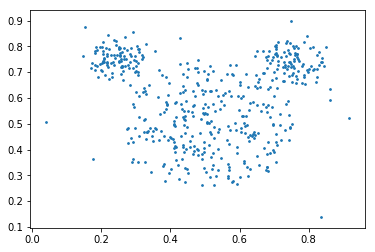

In [6]:
plt.scatter(mdata["X-Axis"],mdata["Y-Axis"],s=3)

<h2>1: Clustering using KMeans</h2>

In [7]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)

In [10]:
sarr=[]
array=[]

for i in range(0,len(mdata)):
    sarr.append(mdata['X-Axis'][i])
    sarr.append(mdata['Y-Axis'][i])
    array.append(sarr)
    sarr=[]

In [11]:
print(np.shape(array))

(500, 2)


In [12]:
X=array
X=np.array(X)
y_km=km.fit_predict(array)
print(y_km)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 2 0 0 0
 0 0 1 0 0 0 2 0 0 0 1 0 0 0 2 0 0 0 2 0 2 1 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 1 2 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 1 2 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 1 0 2 2 1 0 0 0 0 2 0 2 1 0 0 0 2 0 1 2 0 1 0 0 2
 0 0 1 0 0 0 1 0 2 0 2 2 0 0 2 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 1 0 2 0 0
 0 0 0 0 0 2 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 2 1 2 0 2 0 0 2 0 0
 1 1 0 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0
 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 2 2 2 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 1 

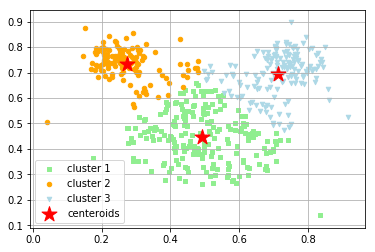

In [13]:
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=20,
            c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=20,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km==2,0],
            X[y_km==2,1],
            s=20,
            c='lightblue',
            marker='v',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centeroids')

plt.legend()
plt.grid()

<h3> Calculating distortion and Silhoutte Coefficient for K-Means clustering</h4>

In [38]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 8.11


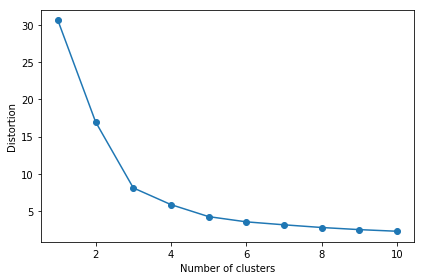

In [39]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

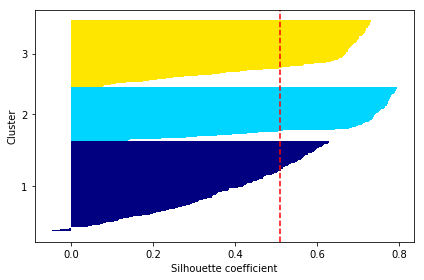

In [40]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

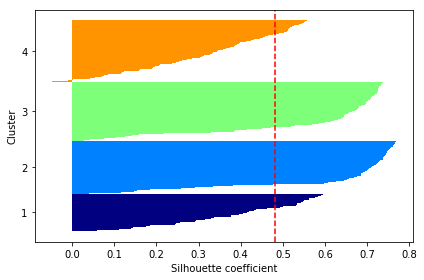

In [41]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

<p>From the figure we can see that best Silhoutte Coefficient is obtained when n_cluster=3</p>

<h2>2: Clustering using AGNES</h2>

In [14]:
from sklearn.cluster import AgglomerativeClustering as Ag

In [15]:
clustering=Ag(n_clusters=3).fit(X)


In [16]:
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000001B1E5EC5598>)

In [17]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
y_km=np.array(clustering.labels_)

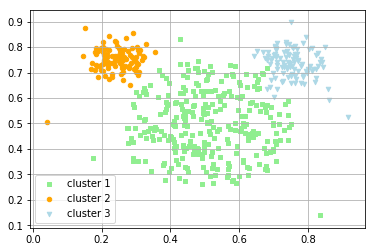

In [19]:
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=20,
            c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=20,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km==2,0],
            X[y_km==2,1],
            s=20,
            c='lightblue',
            marker='v',
            label='cluster 3')


plt.legend()
plt.grid()

<h2>3: Clustering using DIANA</h2>

<h4>I have implemented DIANA using R code which is given below.</h4>
<p>mouse_data<-read.csv(file = "C:/Users/Arush/Desktop/Lab/ML Assign 2/mouse.csv")<br/>
    dv-<diana(mouse_data,metric="euclidean",trace.lev=0)<br/>
    print(dv)<br/>
    plot(dv)</p>

<h4>The output plot is given below(though it is not clear:p)</h4>

<img src="dianaplot.png">

<h2>4: Clustering using SOM</h2>

In [20]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import somoclu

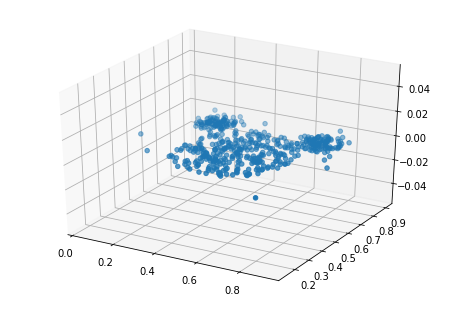

In [26]:
df_model_SOM=mdata[["X-Axis","Y-Axis"]]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_model_SOM['X-Axis'], df_model_SOM['Y-Axis'])
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_model_SOM=ss.fit_transform(df_model_SOM)
n_rows, n_columns = 20, 20#rows and column of the map
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, neighborhood='bubble')
%time som.train(df_model_SOM)

Wall time: 77.8 ms


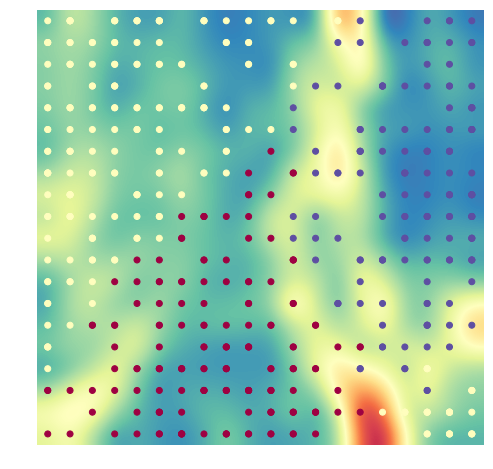

<module 'matplotlib.pyplot' from 'c:\\users\\arush\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [28]:
algorithm = KMeans(n_clusters=3)
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

In [42]:
activation_map=som.get_surface_state()
data_activation_map=pd.DataFrame(activation_map)
data_activation_map.shape


(500, 400)

In [30]:
model=KMeans(n_clusters=3).fit(data_activation_map)
labels=model.labels_

In [31]:
y_km=np.array(labels)

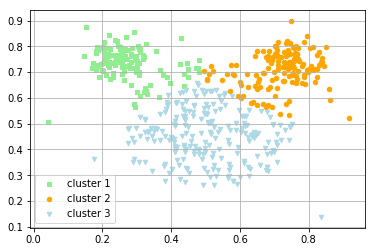

In [32]:
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=20,
            c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=20,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km==2,0],
            X[y_km==2,1],
            s=20,
            c='lightblue',
            marker='v',
            label='cluster 3')


plt.legend()
plt.grid()